##Author: DEVA MACHA

Data Science And Analytics Intern

##Sparks Foundation

### Task Name: Prediction using Decision Tree Algorithm


In [47]:
# importing  libraries
import pandas as pd
import numpy as np

# loading the data set
df = pd.read_csv("/content/Iris.csv")

print(df.head())
print(df.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


Data pre-processing

In [5]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Nah Null, Nice!

lets shuffle the data frame, to ensure each data point creates an independent change on the model

In [48]:
from sklearn.utils import shuffle
df = shuffle(df)

In [49]:
#after shuffling
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica
33,34,5.5,4.2,1.4,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
139,140,6.9,3.1,5.4,2.1,Iris-virginica


In [50]:
# specify the features and target
features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
target = ["Species"]

In [79]:
X = df[features]
y = df[target]
print(X.head())
print("-"*100)
print(y.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
15             5.7           4.4            1.5           0.4
148            6.2           3.4            5.4           2.3
33             5.5           4.2            1.4           0.2
130            7.4           2.8            6.1           1.9
127            6.1           3.0            4.9           1.8
----------------------------------------------------------------------------------------------------
            Species
15      Iris-setosa
148  Iris-virginica
33      Iris-setosa
130  Iris-virginica
127  Iris-virginica


In [52]:
# what are the unique values in target variable
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
# our target is a nominal variable wiht three values
# lets do the nominal encoding 
# 'Iris-setosa'     ---> 0 
# 'Iris-versicolor' ---> 1
# 'Iris-virginica' ----> 2
y.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [54]:
# after encoding
y.head()

,Species
15,0
148,2
33,0
130,2
127,2


###Now let us define the Decision Tree Algorithm

In [55]:
# DecisionTreeClassifier library
from sklearn.tree import DecisionTreeClassifier
# To do grid search for best parameters
from sklearn.model_selection import GridSearchCV


In [56]:
# parameters grid
param_grid = {
    'max_depth':[5,15,25],
    'min_samples_leaf':[1,3],
    'max_leaf_nodes':[10, 20, 35, 50]
}
# its going to choose the best parameters set among 24 possible parameters set

In [57]:
# create the model and grid search objects
dtree=DecisionTreeClassifier()
gs = GridSearchCV(dtree,param_grid,scoring="f1_macro",cv = 5)

In [58]:
gs.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 15, 25],
                         'm

In [74]:
# let's see best parameters
print("best params",gs.best_params_)

best params {'max_depth': 15, 'max_leaf_nodes': 10, 'min_samples_leaf': 3}


In [75]:
# let's see the best score
print("best score",gs.best_score_)

best score 0.9664818612187034


Use the best parameters to build our model

In [61]:
#use the best params for decision tree model
from sklearn.model_selection import train_test_split
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [69]:
# using the above parameters
goodDtClassifier = DecisionTreeClassifier(max_depth= 15, max_leaf_nodes= 10, min_samples_leaf= 3)

In [70]:
# training the model
goodDtClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Evaluating the model

In [73]:

from sklearn.metrics import  precision_score
accuracy = bestDtClassifier.score(X_test,y_test)
print("accuracy =",score) 
y_predicted = goodDtClassifier.predict(X_test)
precision  =  precision_score(y_test,y_predicted,average='macro')
print("precision =",precision)

accuracy = 0.9473684210526315
precision = 0.9393939393939394


###Let us visualize the Decision Tree to understand it better.

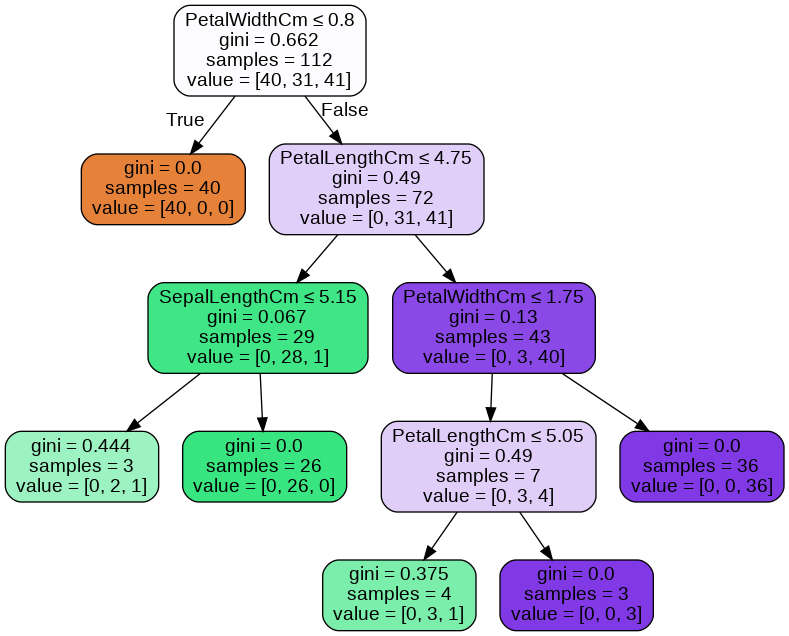

In [77]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(goodDtClassifier, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())